In [112]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD

In [113]:
#读取训练集和测试集数据
orgin_data=pd.read_csv("./train_data/orgin_data_first000.csv")

E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [114]:
#划分特征和标签
x_data=orgin_data[["Dur","Proto","Dir","TotPkts","TotBytes","State"]]
y_data=orgin_data[["Label"]]

In [115]:
#划分训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3)

In [116]:
x_train

Dur  Proto  Dir  TotPkts  TotBytes  State
5417511    25.995600      2    3        2       144     10
1554911     0.000791      2    3        2       136     10
2502395     0.000316      2    3        2       238     10
3199011     8.912350      1    1        3       186     30
1719434     0.789144      2    3        6       406     10
...              ...    ...  ...      ...       ...    ...
4499969     0.000810      2    3        2       246     10
1900611     0.000144      2    3        2       214     10
1172589     0.000953      2    3        2       143     10
947541   2747.800781      2    3        8      1010     10
1641361     0.422538      2    3        4      1045     10

[3861638 rows x 6 columns]

In [117]:
print(x_train.shape)

(3861638, 6)


In [144]:
#创建模型
model_line=Sequential()
model_line.add(LSTM(64,activation="sigmoid",input_shape=(6,1),return_sequences=True))
model_line.add(LSTM(32,activation="sigmoid",return_sequences=True))
model_line.add(LSTM(8,activation="sigmoid",return_sequences=True))
model_line.add(LSTM(8,activation="sigmoid",return_sequences=True))
model_line.add(LSTM(8,activation="sigmoid",return_sequences=False))
model_line.add(Dropout(0.5))
model_line.add(Dense(1,activation='relu'))
model_line.summary()
model_line.compile(optimizer="adam",
                  loss="mean_absolute_error",
                  metrics="accuracy")

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 6, 64)             16896     
_________________________________________________________________
lstm_55 (LSTM)               (None, 6, 32)             12416     
_________________________________________________________________
lstm_56 (LSTM)               (None, 6, 8)              1312      
_________________________________________________________________
lstm_57 (LSTM)               (None, 6, 8)              544       
_________________________________________________________________
lstm_58 (LSTM)               (None, 8)                 544       
_________________________________________________________________
dropout_24 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)               

In [119]:
x_train.values

array([[2.59956000e+01, 2.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        1.44000000e+02, 1.00000000e+01],
       [7.91000000e-04, 2.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        1.36000000e+02, 1.00000000e+01],
       [3.16000000e-04, 2.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        2.38000000e+02, 1.00000000e+01],
       ...,
       [9.53000000e-04, 2.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        1.43000000e+02, 1.00000000e+01],
       [2.74780078e+03, 2.00000000e+00, 3.00000000e+00, 8.00000000e+00,
        1.01000000e+03, 1.00000000e+01],
       [4.22538000e-01, 2.00000000e+00, 3.00000000e+00, 4.00000000e+00,
        1.04500000e+03, 1.00000000e+01]])

In [120]:
x_x_train=[]
for i in x_train.values:
    x_x_train.append([[i[0]],[i[1]],[i[2]],[i[3]],[i[4]],[i[5]]])
x_x_test=[]
for i in x_test.values:
    x_x_test.append([[i[0]],[i[1]],[i[2]],[i[3]],[i[4]],[i[5]]])

In [121]:
x_x_train=np.array(x_x_train)
x_x_test=np.array(x_x_test)

In [145]:
#模型训练
history=model_line.fit(x_x_train,y_train.values,batch_size=128,epochs=5)

Epoch 1/5
30170/30170 [==============================] - 333s 11ms/step - loss: 0.3721 - accuracy: 0.6298
Epoch 2/5
30170/30170 [==============================] - 324s 11ms/step - loss: 0.4048 - accuracy: 0.5954
Epoch 3/5
30170/30170 [==============================] - 324s 11ms/step - loss: 0.2884 - accuracy: 0.7546
Epoch 4/5
30170/30170 [==============================] - 323s 11ms/step - loss: 0.2485 - accuracy: 0.7618
Epoch 5/5
30170/30170 [==============================] - 326s 11ms/step - loss: 0.2704 - accuracy: 0.7298


In [63]:
print("train loss：", model_line.evaluate(x_x_train, y_train.values))
print("test loss：", model_line.evaluate(x_x_test, y_test.values))

61539/61539 [==============================] - 61s 989us/step - loss: 0.2247 - accuracy: 0.9854
train loss： [0.22470813989639282, 0.9854339957237244]
26374/26374 [==============================] - 27s 1ms/step - loss: 0.2244 - accuracy: 0.9855
test loss： [0.22436656057834625, 0.9854531288146973]


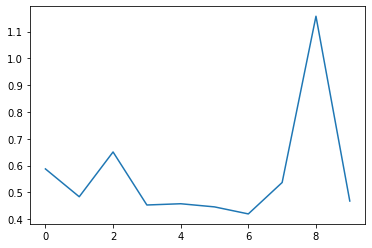

In [124]:
plt.plot(history.epoch[:], history.history.get('loss')[:], label="loss")
plt.show()

In [146]:
pred=model_line.predict(x_x_test)

In [147]:
pred

array([[0.99996305],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.99972236]], dtype=float32)

In [133]:
print(accuracy_score(pred,y_test.values))

0.5021241833027289


In [41]:
print(pred,"*****",y_test.values)

[[0.00138602]
 [0.00053343]
 [0.00178456]
 ...
 [0.00140545]
 [0.02177987]
 [0.00178766]] ***** [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [148]:
count1=0
count2=0
count=0
for i in range(len(pred)):
    count+=1
    if pred[i][0]==0:
        count1+=1
    if y_test.values[i][0]==0:
        count2+=1
print(count,count1,count2)

1654989 1136682 831010


In [98]:
print(len(y_test))

843961


In [ ]:
# 对数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
x_x_x_train = scaler.fit_transform(x_x_train)
print(data_lstm)

In [109]:
model = Sequential()
model.add(Conv1D(filters=64,kernel_size=2,input_shape=(6,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50))
model.add(Dense(1,activation="relu"))
model.summary()
adam_a = Adam(lr=0.001)
model.compile(
    loss="binary_crossentropy",
    optimizer=adam_a,
    metrics="accuracy"
)
his = model.fit(x_x_x_train, y_train.values, epochs=20, batch_size=64)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 5, 64)             192       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 50)                6450      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 51        
Total params: 6,693
Trainable params: 6,693
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
30770/30770 [==============================] - 30s 947us/step - loss: 0.2252 - accuracy: 0.9854
Epoch 2/20

In [110]:
pred=model.predict(x_x_test)
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [111]:
count1=0
count2=0
for i in range(len(pred)):
    if pred[i][0]==0:
        count1+=1
    if y_test.values[i][0]==0:
        count2+=1
print(count1,count2)

843961 831684
